In [8]:
import knee_point as knp
import numpy as np
import math

import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

import points_distance as pd

### center point on knee area:
- 4605 : right
- 11223 : left

In [9]:
points = knp.getKneePoints(8)
center_points = knp.getCenterKneePoint(points)
# center_point = 11223 4605

knl, list_index = knp.getNeighborPoints(11223,0.3,'na','1')
# knr, list_index = knp.getNeighborPoints(4605,0.4,'na','5')

import utilities as uti
import open3d as o3d

left = uti.createPointCloud(knl[:,:3])
right = uti.createPointCloud(knr[:,:3])
o3d.visualization.draw_geometries([left,right])

### params neighbor:
- 1.center point
- 2.radius(0..0.5 is reasonable)
- 3.curve type(default is guass, from{gauss,mean,rms,abs})
- 4.pose number(default is 1, from 1..8)

In [10]:
result_gauss_average = []
result_mean_average = []
result_abs_average = []
result_rms_average = []
for  i in range(1,9):
    result_gauss_average.append(np.average(knp.getListPoints(list_index,'fg',str(i))[:,3]))
    result_mean_average.append(np.average(knp.getListPoints(list_index,'fm',str(i))[:,3]))
    result_abs_average.append(np.average(knp.getListPoints(list_index,'fa',str(i))[:,3]))
    result_rms_average.append(np.average(knp.getListPoints(list_index,'fr',str(i))[:,3]))

    frames = 8
    folder_dic_gauss = './Mesh/Gauss Curvature/normal/'
    folder_dic_mean = './Mesh/Mean Curvature/normal/'
    folder_dic_abs = './Mesh/ABS Curvature/normal/'
    folder_dic_rms = './Mesh/RMS Curvature/normal/'
    result_gauss_center = knp.getCurveKnee(center_point,frames,folder_dic_gauss)
    result_mean_center = knp.getCurveKnee(center_point,frames,folder_dic_mean)
    result_rms_center = knp.getCurveKnee(center_point,frames,folder_dic_rms)
    result_abs_center = knp.getCurveKnee(center_point,frames,folder_dic_abs)

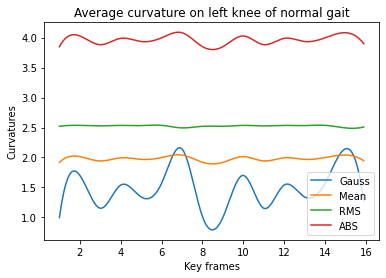

In [11]:
import utilities as uti
from scipy import interpolate

cycle = 2

x = np.arange(1,cycle*8+1,1)
# plt.plot(x,result_gauss_center,label='Gauss Center')
# plt.plot(x,result_mean_center,label='Mean Center')
# plt.plot(x,result_rms_center,label='RMS Center')
# plt.plot(x,result_abs_center,label='ABS Center')

fgauss = interpolate.interp1d(x,uti.multipleArray(cycle,result_gauss_average),kind='cubic')
fmean = interpolate.interp1d(x,uti.multipleArray(cycle,result_mean_average),kind='cubic')
frms = interpolate.interp1d(x,uti.multipleArray(cycle,result_rms_average),kind='cubic')
fabs = interpolate.interp1d(x,uti.multipleArray(cycle,result_abs_average),kind='cubic')

xnew = np.arange(1,cycle*8,0.1)
ygauss = fgauss(xnew)
ymean = fmean(xnew)
yrms = frms(xnew)
yabs = fabs(xnew)

plt.plot(xnew,ygauss,label='Gauss')
plt.plot(xnew,ymean,label='Mean')
plt.plot(xnew,yrms,label='RMS')
plt.plot(xnew,yabs,label='ABS')

plt.title("Average curvature on left knee of fixed gait")
plt.xlabel('Key frames')
plt.ylabel('Curvatures')
plt.legend()

plt.show()

table = np.empty((4,8))
table[0] = result_gauss_average
table[1] = result_mean_average
table[2] = result_rms_average
table[3] = result_abs_average

import pandas as pd

## convert your array into a dataframe
df = pd.DataFrame(table)

## save to xlsx file

filepath = 'table.xlsx'

df.to_excel(filepath, index=False)